**DSP MIDTERM PROJECT**


In [12]:
import pandas as pd
import openpyxl
import numpy as np
import scipy as sp
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fft import fft

**CALLING DATA**
[link to data](https://docs.google.com/spreadsheets/d/1SvghrZuhfXN-w6WdIAeLllWwTIO_gnlODdpiO3j6hiU/edit?fbclid=IwAR3qzuFGUKOr4g6a7sZMfzEjq-emboXgCggIA5KyXeZb4Ylp9d2fIvWrRHM#gid=0)

In [13]:
# Inputting data from file folder
file_path = 'DSP_Midterm_project1.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Displaying the first few rows of the Data to prove file is working
df.head()






,date,humidity,temperature
0,"Friday,-November-03-2023-19:53:27",55.5,28.9
1,"Friday,-November-03-2023-20:08:12",70.0,32.2
2,"Friday,-November-03-2023-20:23:16",70.0,32.0
3,"Friday,-November-03-2023-20:38:19",69.5,33.8
4,"Friday,-November-03-2023-20:53:23",71.3,33.7


**Apply digital low-pass filter for noise removal on data**


In [14]:
# Load your data from a CSV or Excel file, replace 'your_data.csv' with your data file
df = pd.read_excel('DSP_Midterm_project1.xlsx')
# Convert the 'date' column to datetime if it's not already in that format
df['date'] = pd.to_datetime(df['date'])
#sort the date column
df = df.sort_values(by='date')

# Define a function to apply a low-pass filter
def apply_low_pass_filter(data, cutoff_freq, fs):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = signal.butter(6, normal_cutoff, btype='low', analog=False)
    filtered_data = signal.lfilter(b, a, data)
    return filtered_data

# Define cutoff frequency and sampling frequency
cutoff_frequency = 0.01  # Adjust this value based on your data
sampling_frequency = 1  # Assuming data is sampled at a rate of 1 sample per unit time

# Apply the low-pass filter to 'humidity' and 'temperature'
df['filtered_humidity'] = apply_low_pass_filter(df['humidity'], cutoff_frequency, sampling_frequency)
df['filtered_temperature'] = apply_low_pass_filter(df['temperature'], cutoff_frequency, sampling_frequency)



**VISUALIZING**

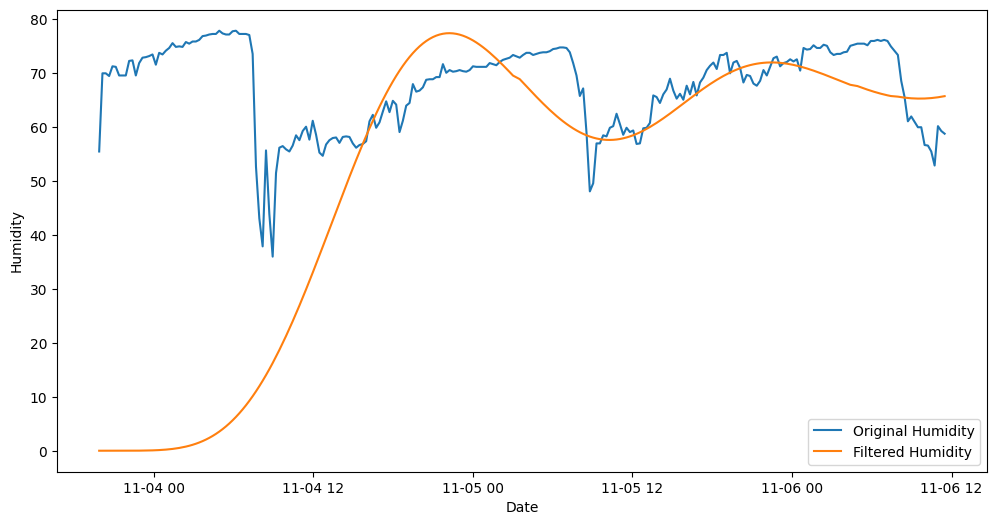

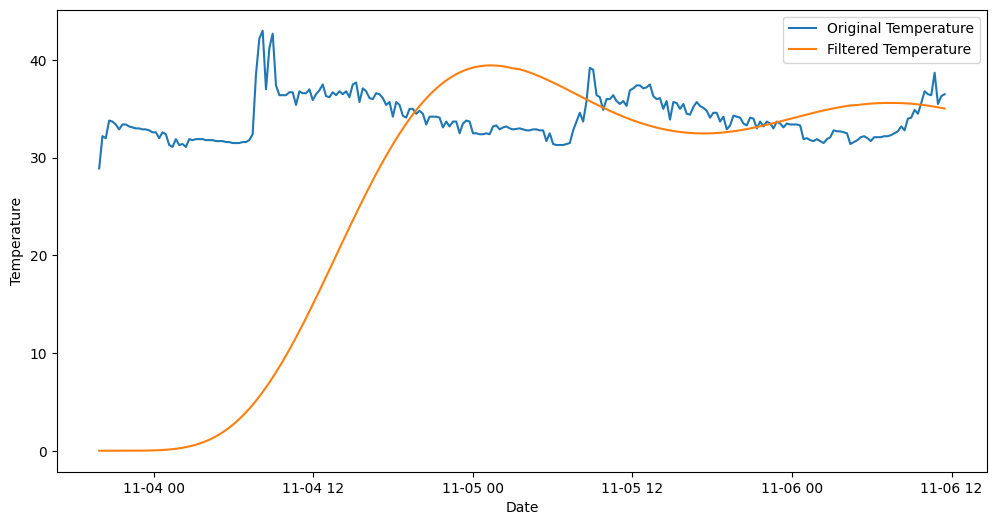

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['humidity'], label='Original Humidity')
plt.plot(df['date'], df['filtered_humidity'], label='Filtered Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.legend()

plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['temperature'], label='Original Temperature')
plt.plot(df['date'], df['filtered_temperature'], label='Filtered Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()

plt.show()


***Compute FFT for periodicity detection.***

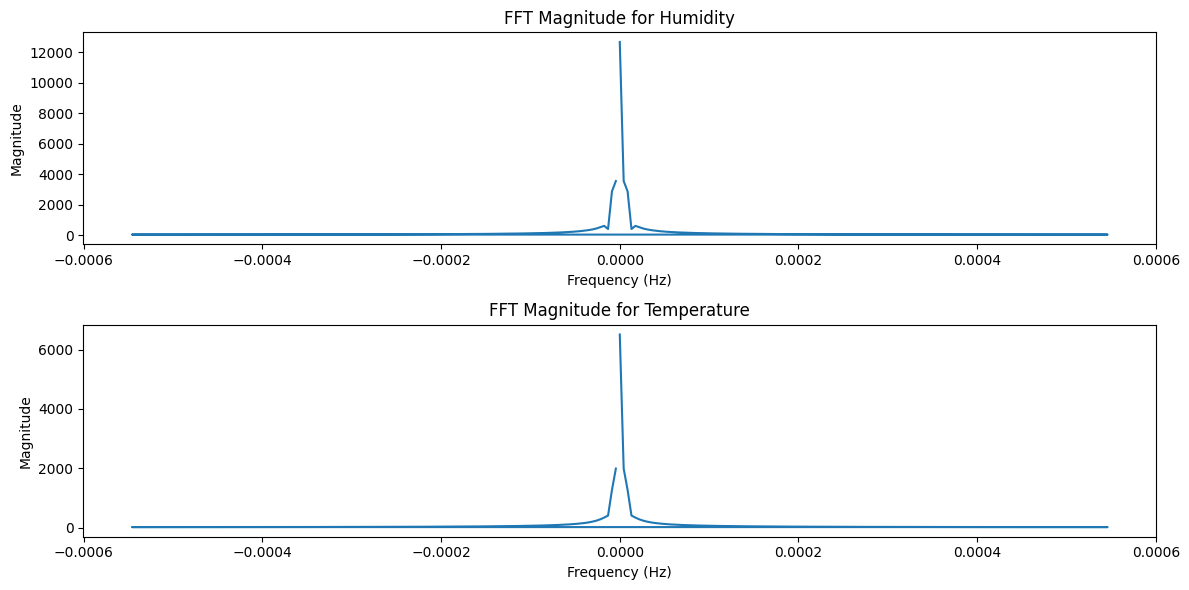

In [21]:
# Assuming 'Filtered_Humidity' and 'Filtered_Temperature' are the columns you want to apply FFT to
filtered_humi = df['filtered_humidity']
filtered_temp = df['filtered_temperature']

# Calculate time interval
total_time_span = (df['date'].iloc[-1] - df['date'].iloc[0]).total_seconds()
num_data_points = len(df)
time_interval_seconds = total_time_span / num_data_points

# Compute the FFT for Humidity
fft_result_humi = np.fft.fft(fft_humi)

# Compute the FFT for Temperature
fft_result_temp = np.fft.fft(fft_temp)

# Compute the corresponding frequencies
n = len(fft_humi)  # Use the length of one of the FFT results
sampling_rate = 1.0 / time_interval_seconds
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

# Plot the magnitude of the FFT components for Humidity
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(frequencies, np.abs(fft_result_humi))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Magnitude for Humidity')

# Plot the magnitude of the FFT components for Temperature
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(fft_result_temp))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Magnitude for Temperature')

plt.tight_layout()  # Ensures the plots are displayed neatly
plt.show()


*** Calculating the central tendencies (mean, median, mode) for overall and filtered data.***

In [48]:

mean_filtered_humidity = df['filtered_humidity'].mean()
median_filtered_humidity = df['filtered_humidity'].median()
mode_filtered_humidity = df['filtered_humidity'].mode().values[0]

mean_filtered_temperature = df['filtered_temperature'].mean()
median_filtered_temperature = df['filtered_temperature'].median()
mode_filtered_temperature = df['filtered_temperature'].mode().values[0]

print("Overall Data (Filtered):")
print(f"Mean Filtered Humidity: {mean_filtered_humidity}")
print(f"Median Filtered Humidity: {median_filtered_humidity}")
print(f"Mode Filtered Humidity: {mode_filtered_humidity}")

print(f"Mean Filtered Temperature: {mean_filtered_temperature}")
print(f"Median Filtered Temperature: {median_filtered_temperature}")
print(f"Mode Filtered Temperature: {mode_filtered_temperature}")



Overall Data (Filtered):
Mean Filtered Humidity: 50.52234073711842
Median Filtered Humidity: 63.92069594810612
Mode Filtered Humidity: 4.735035367880343e-08
Mean Filtered Temperature: 25.933169865621217
Median Filtered Temperature: 33.26293829178384
Mode Filtered Temperature: 2.465631029400755e-08



**Employ STFT for time-frequency analysis and pattern recognition.
**

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 256 is greater than input length  = 251, using nperseg = 251
  warnings.warn('nperseg = {0:d} is greater than input length '


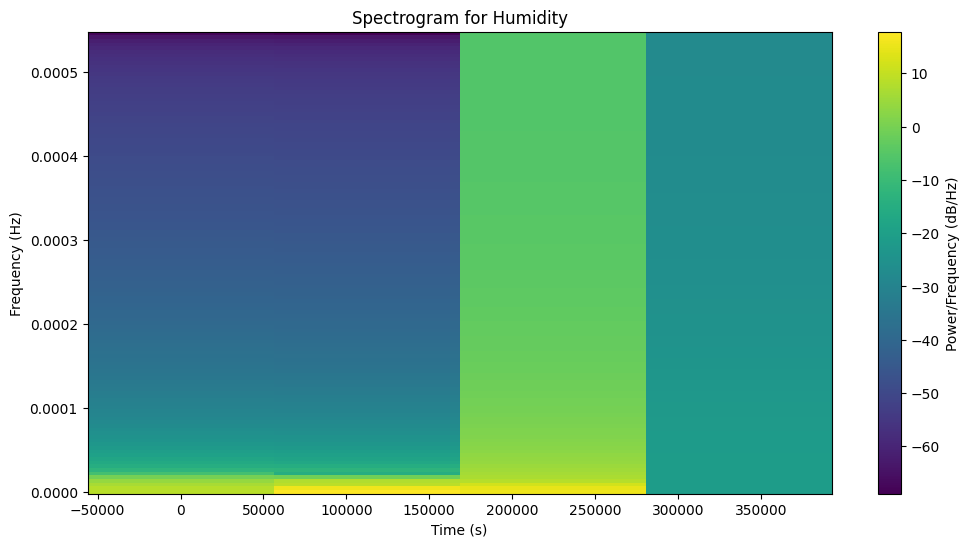

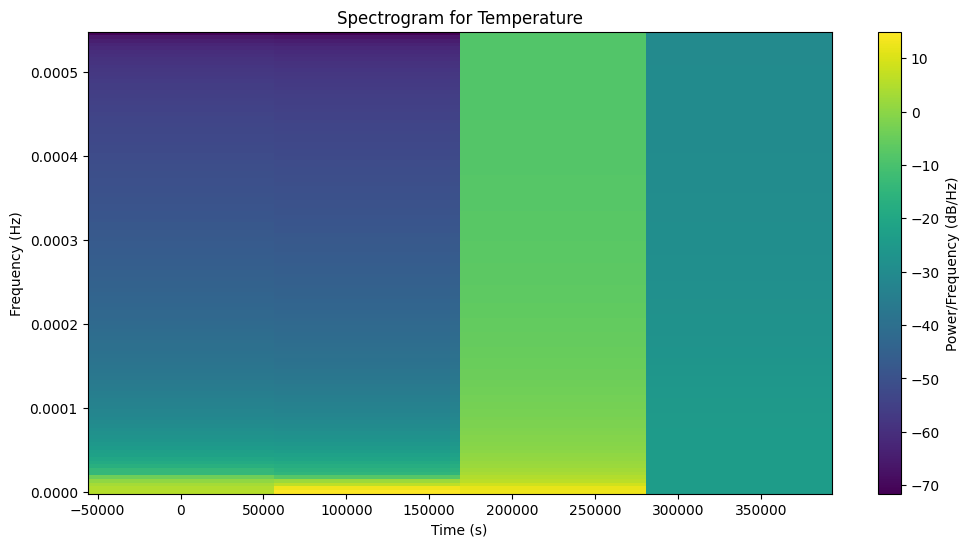

In [22]:
from scipy.signal import stft

nperseg = 256  # Length of each segment
noverlap = 128  # Overlap between segments

# Compute the STFT for Humidity
frequencies_humi, time_humi, stft_humi = stft(filtered_humi, fs=1.0 / time_interval_seconds, nperseg=nperseg, noverlap=noverlap)

# Compute the STFT for Temperature
frequencies_temp, time_temp, stft_temp = stft(filtered_temp, fs=1.0 / time_interval_seconds, nperseg=nperseg, noverlap=noverlap)

# Plot the spectrogram for Humidity
plt.figure(figsize=(12, 6))
plt.pcolormesh(time_humi, frequencies_humi, 10 * np.log10(np.abs(stft_humi)), shading='auto')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title('Spectrogram for Humidity')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

# Plot the spectrogram for Temperature
plt.figure(figsize=(12, 6))
plt.pcolormesh(time_temp, frequencies_temp, 10 * np.log10(np.abs(stft_temp)), shading='auto')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title('Spectrogram for Temperature')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.show()



**Use statistical methods to ascertain data variability and relationships**

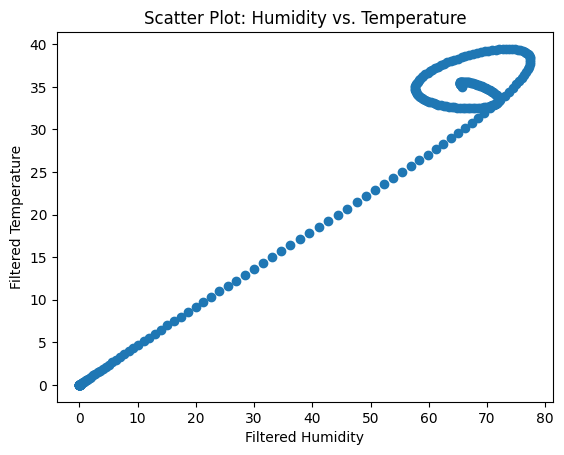

In [29]:
correlation = df['filtered_humidity'].corr(df['filtered_temperature'])

plt.scatter(df['filtered_humidity'], df['filtered_temperature'])
plt.xlabel('Filtered Humidity')
plt.ylabel('Filtered Temperature')
plt.title('Scatter Plot: Humidity vs. Temperature')
plt.show()



In [33]:
from scipy.stats import pearsonr

# Perform a Pearson correlation test
correlation, p_value = pearsonr(df['filtered_humidity'], df['filtered_temperature'])

if p_value < 0.05:  # Adjust the significance level as needed
    print(f'The correlation between humidity and temperature is significant (p-value={p_value:.4f})')
else:
    print(f'The correlation between humidity and temperature is not significant (p-value={p_value:.4f})')


The correlation between humidity and temperature is significant (p-value=0.0000)



***Utilizing interpolation for prediction.***

                  date  predicted_humidity  predicted_temperature
0  2023-11-03 19:53:27        4.735035e-08           2.465631e-08
1  2023-11-03 20:53:27        6.056768e-05           3.025194e-05
2  2023-11-03 21:53:27        1.728913e-03           8.439142e-04
3  2023-11-03 22:53:27        1.426528e-02           6.889095e-03
4  2023-11-03 23:53:27        6.419983e-02           3.082460e-02
..                 ...                 ...                    ...
59 2023-11-06 06:53:27        6.608572e+01           3.560251e+01
60 2023-11-06 07:53:27        6.568705e+01           3.560172e+01
61 2023-11-06 08:53:27        6.538220e+01           3.553538e+01
62 2023-11-06 09:53:27        6.532122e+01           3.539285e+01
63 2023-11-06 10:53:27        6.552618e+01           3.518158e+01

[64 rows x 3 columns]


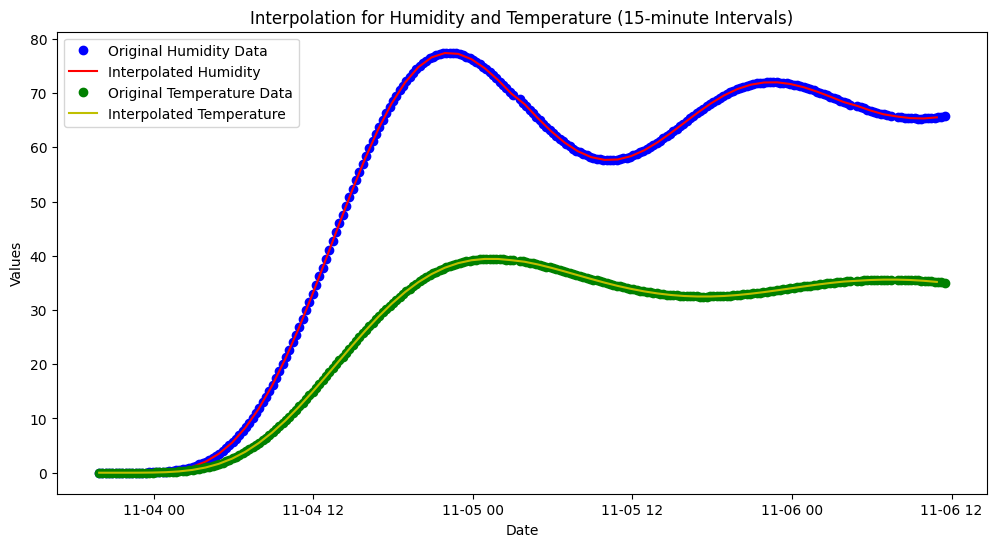

In [40]:

from scipy import interpolate



# Sort the DataFrame by the 'date' column (if not already sorted)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')

# Define the time points where you want to interpolate (15-minute intervals)
time_interval = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='1H')

# Convert the datetime values to timestamps (numeric values)
timestamps = (time_interval - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Perform linear interpolation for 'filtered_humidity'
humidity_interp = interpolate.interp1d(df['date'].view(int) // 10**9, df['filtered_humidity'], kind='linear')
humidity_predicted = humidity_interp(timestamps)

# Perform linear interpolation for 'filtered_temperature'
temperature_interp = interpolate.interp1d(df['date'].view(int) // 10**9, df['filtered_temperature'], kind='linear')
temperature_predicted = temperature_interp(timestamps)

# Create a DataFrame with the interpolated values
predicted_df = pd.DataFrame({'date': time_interval, 'predicted_humidity': humidity_predicted, 'predicted_temperature': temperature_predicted})

# Print the DataFrame with interpolated values
print(predicted_df)

# Visualize the interpolated data
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['filtered_humidity'], 'bo', label='Original Humidity Data')
plt.plot(predicted_df['date'], predicted_df['predicted_humidity'], 'r-', label='Interpolated Humidity')
plt.plot(df['date'], df['filtered_temperature'], 'go', label='Original Temperature Data')
plt.plot(predicted_df['date'], predicted_df['predicted_temperature'], 'y-', label='Interpolated Temperature')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.title('Interpolation for Humidity and Temperature (15-minute Intervals)')
plt.show()


In [26]:
print(df.columns)


Index(['date', 'humidity', 'temperature', 'filtered_humidity',
       'filtered_temperature'],
      dtype='object')
